/tmp/ipykernel_3688/2160374392.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=start_date, periods=num_dates, freq=freq).tolist()


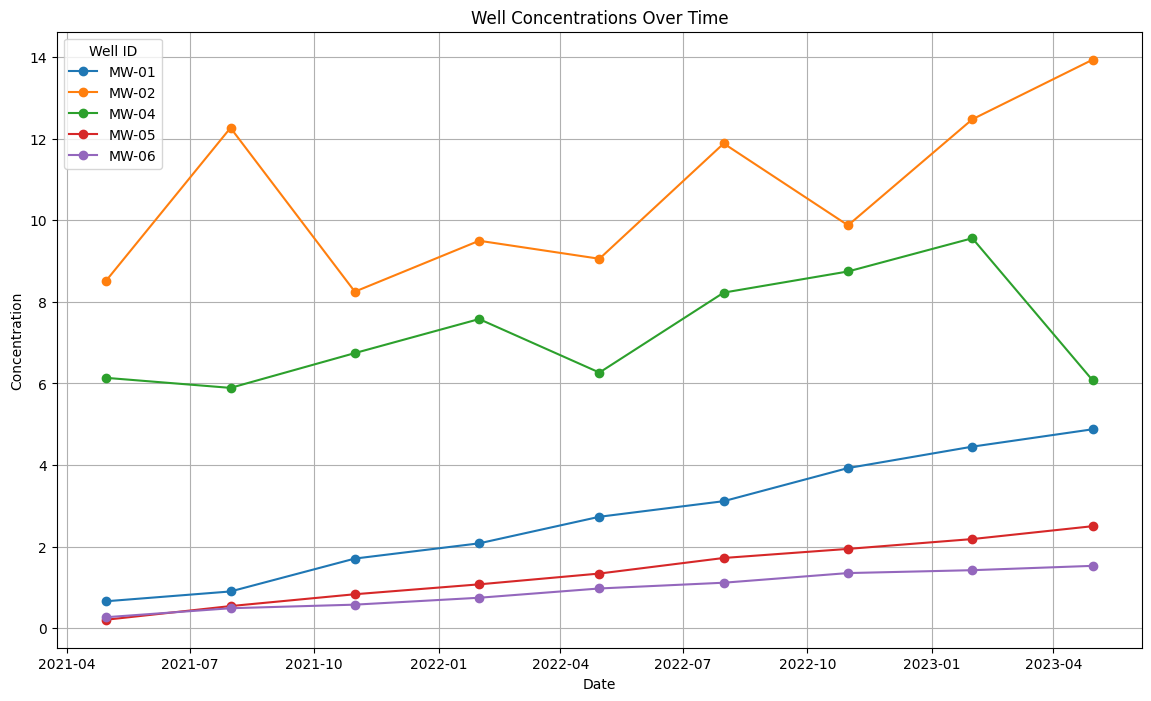

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_dates(start_date, num_dates, freq):
    dates = pd.date_range(start=start_date, periods=num_dates, freq=freq).tolist()
    return [date.strftime('%m/%d/%Y') for date in dates]

def generate_concentration(num_samples, base_value, variability):
    trend = np.linspace(base_value, base_value + variability, num_samples)
    random_noise = np.random.normal(0, base_value * 0.2, num_samples)
    concentration = trend + random_noise
    concentration = np.clip(concentration, a_min=0, a_max=None)  # Ensure no negative values
    return concentration

# Define well IDs
well_ids = ['MW-01', 'MW-02', 'MW-04', 'MW-05', 'MW-06']

# Generate random base concentrations and variability for each well
base_concentrations = np.random.uniform(0.0001, 10.0, len(well_ids))
variability = np.random.uniform(0.0001, 5.0, len(well_ids))

# Generate data
data = {
    'ID': [],
    'Date': [],
    'Concentration': []
}

start_date = '4/6/2021'
num_dates = 9
freq = '3M'  # Every 3 months

for well_id, base_value, var in zip(well_ids, base_concentrations, variability):
    dates = generate_dates(start_date, num_dates, freq)
    concentrations = generate_concentration(num_dates, base_value, var)
    
    data['ID'].extend([well_id] * num_dates)
    data['Date'].extend(dates)
    data['Concentration'].extend(concentrations)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(14, 8))

for well_id in well_ids:
    well_data = df[df['ID'] == well_id]
    plt.plot(well_data['Date'], well_data['Concentration'], marker='o', label=well_id)

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Well Concentrations Over Time')
plt.legend(title='Well ID')
plt.grid(True)
plt.show()
